    index                                Studiengang  Bruttogehalt (Euro)
14     19      Philosophie und Geisteswissenschaften              52028.0
13     18       Geschichts- und Kulturwissenschaften              53139.0
12     17  Erziehungswissenschaften, Sozialpädagogik              54456.0
11     16          Politik- und Sozialwissenschaften              57239.0
10     15                          Geowissenschaften              58768.0
9      14                                Architektur              59083.0
8      13                                Psychologie              60585.0
7      12        BWL, VWL, Wirtschaftswissenschaften              67361.0
6      11                        Naturwissenschaften              67983.0
5      10                  Mathematik und Informatik              68578.0
4       9                      Wirtschaftsinformatik              70087.0
3       8                    Ingenieurwissenschaften              71059.0
2       7                  Wirtschafts

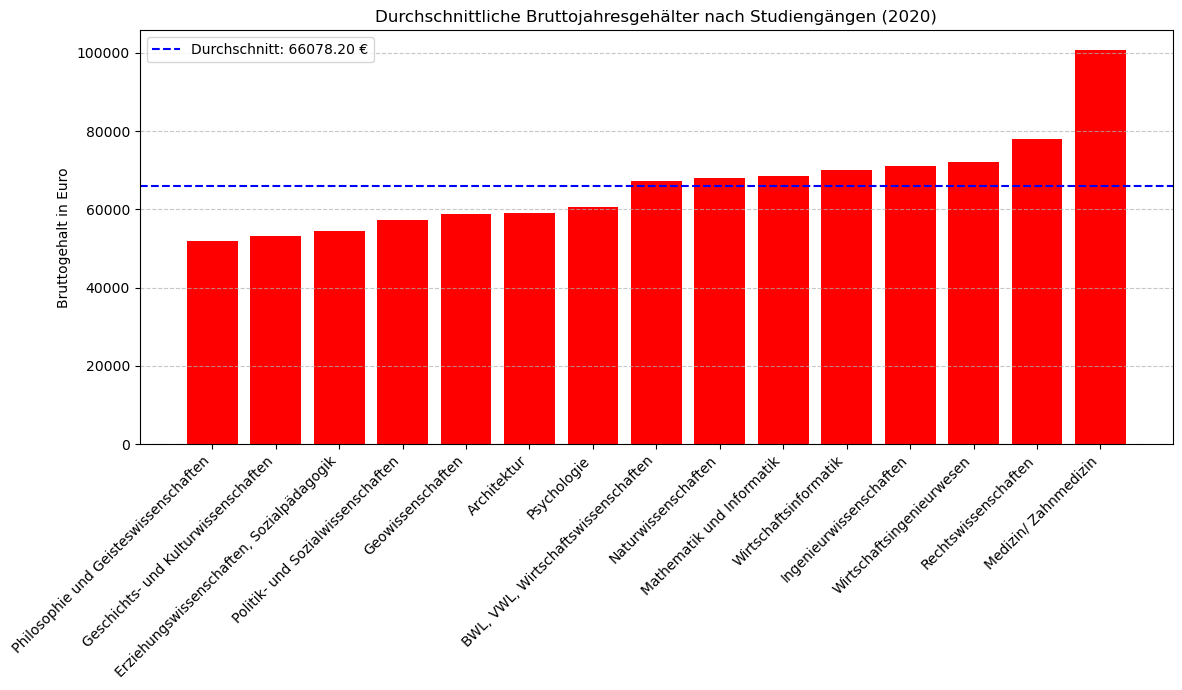

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Excel-Datei und Blattname
datei = "data/bruttojahresgehaelter_nach_studiengaengen.xlsx"
blatt = "Daten"

# Daten einlesen
df = pd.read_excel(datei, sheet_name=blatt, header=None)

# Nur Zeilen 5 bis 19 und Spalten 1 und 2 auswählen
df = df.iloc[5:20, [1, 2]]
df.columns = ['Studiengang', 'Bruttogehalt (Euro)']

# Zeilen mit fehlenden Werten löschen
df = df.dropna()

# Index zurücksetzen, alter Index als Spalte behalten
df = df.reset_index(drop=False)

# Sortieren
df = df.sort_values(by='Bruttogehalt (Euro)', ascending=True)

# Ausgabe
print(df)

# Durchschnitt berechnen
durchschnitt = df['Bruttogehalt (Euro)'].mean()

plt.figure(figsize=(12, 7))
plt.bar(df['Studiengang'], df['Bruttogehalt (Euro)'], color='red')
plt.xticks(rotation=45, ha='right') # X-Achsen-Beschriftung drehen und ausrichten
plt.ylabel('Bruttogehalt in Euro')
plt.title('Durchschnittliche Bruttojahresgehälter nach Studiengängen (2020)')
plt.ylim(0, df['Bruttogehalt (Euro)'].max() + 5000) # Y-Achse mit Puffer
plt.grid(axis='y', linestyle='--', alpha=0.7) # Gitterlinien

# Durchschnittslinie hinzufügen
plt.axhline(durchschnitt, color='blue', linestyle='--', label=f'Durchschnitt: {durchschnitt:.2f} €')

# Legende anzeigen
plt.legend()
plt.tight_layout() # Passt die Abstände im Diagramm automatisch an (keine überlappung/ abschnitt)

# Speichern und Anzeigen
plt.savefig("bilder/bruttojahresgehaelter_saeulendiagramm.png")
plt.show()


# Speichern
df.to_excel("tabellen/bruttogehälter_nach_studiengang.xlsx", index=False)
df.to_csv("tabellen/bruttogehälter_nach_studiengang.csv", index=False, sep=';')
